In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

#load data
ncum_g = xr.open_dataset('e:\\Dissertation\\data\\ncumg_day1rf_jjas2023.nc')
ncum_r = xr.open_dataset('e:\\Dissertation\\data\\ncumr_day1rf_jjas2023.nc')
obs = xr.open_dataset('e:\\Dissertation\\data\\obs_JJAS2023.nc')

#regrid
ncum_g_regridded = ncum_g.interp_like(obs, method='nearest')
ncum_r_regridded = ncum_r.interp_like(obs, method='nearest')

#lat and lon slice
obs = obs.sel(lat=slice(6, 41), lon=slice(62, 106))
ncum_g_regridded = ncum_g_regridded.sel(lat=slice(6, 41), lon=slice(62, 106))
ncum_r_regridded = ncum_r_regridded.sel(lat=slice(6, 41), lon=slice(62, 106))


c:\Users\candy\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
ncum_g

<xarray.Dataset>
Dimensions:       (time: 122, lon: 313, lat: 384)
Coordinates:
  * time          (time) datetime64[ns] 2023-06-01T03:00:00 ... 2023-09-30T03...
  * lon           (lon) float32 60.03 60.21 60.38 60.56 ... 114.5 114.7 114.9
  * lat           (lat) float32 0.05859 0.1758 0.293 ... 44.71 44.82 44.94
Data variables:
    APCP_SURFACE  (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    history:      Fri Oct 04 13:32:48 2024: cdo mergetime /home/umfcst/VERIF/...
    Conventions:  CF-1.6
    Description:  NCUM-G 12-km Forecast Precipitation
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [78]:
#variance
obs_variance = obs['rain'].var(dim=('lat', 'lon'))
ncum_g_regridded = ncum_g_regridded.dropna(dim='time', how='all')
ncum_g_variance = ncum_g_regridded['APCP_SURFACE'].var(dim=('lat', 'lon'))
#ncum_g_variance = ncum_g_variance.where(ncum_g_variance <= 800, np.nan)
ncum_r_variance = ncum_r_regridded['APCP_24'].var(dim=('lat', 'lon'))


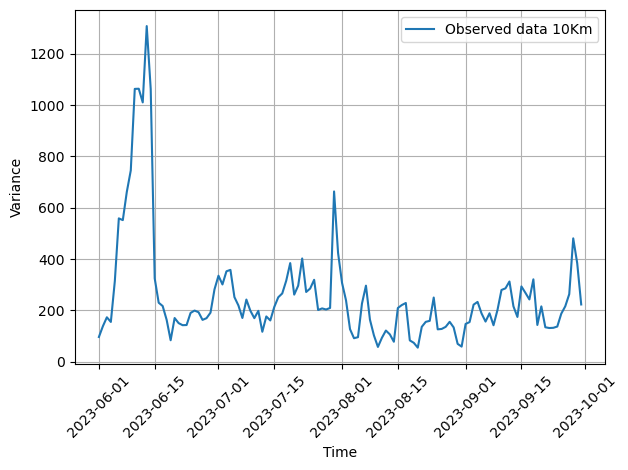

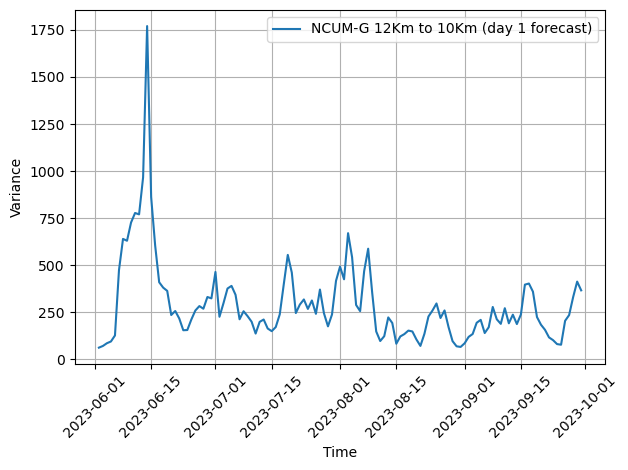

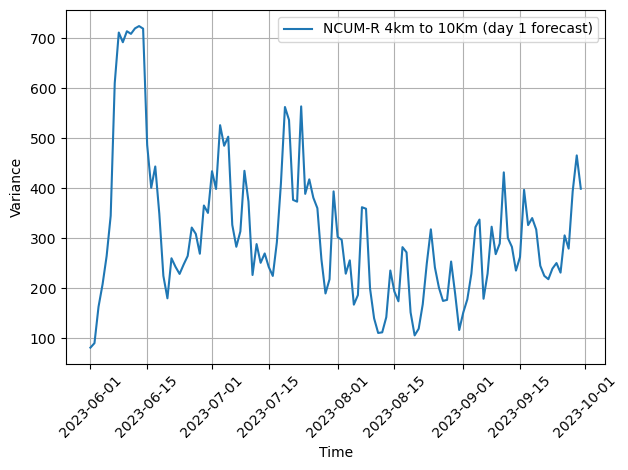

In [79]:
# Plot
#plt.figure(figsize=(10, 6)) 
plt.plot(obs_variance['time'],obs_variance, label='Observed data 10Km')
#plt.title('Comparison of Variances')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Variance')
plt.legend()               
plt.grid(True)       
plt.tight_layout()
plt.show()
plt.plot(ncum_g_variance['time'],ncum_g_variance, label='NCUM-G 12Km to 10Km (day 1 forecast)') 
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Variance')
plt.legend()               
plt.grid(True)       
plt.tight_layout()
plt.show()
plt.plot(ncum_r_variance['time'],ncum_r_variance, label='NCUM-R 4km to 10Km (day 1 forecast)') 
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Variance')
plt.legend()               
plt.grid(True)       
plt.tight_layout()
plt.show()

even tho all datasets clearly follow the trend there are minor differences;

I. Observed Data (10 km):

1. The variance is lower compared to the model outputs.
2. Peaks are smaller, suggesting that the observed data is less extreme.

II. NCUM-G (12 km to 10 km):

1.The variance is high, with significant peaks.(Coz, NCUM-G model overestimates rainfall extremes. maybe due to it,s coarser resolution).

III. NCUM-R (4 km to 10 km):

1. The variance lies between observed data and NCUM-G. 
2. It has peaks, but they are not as extreme as NCUM-G. (Coz, captures details better than NCUM-G but still differs from observations).
3. Multiple peaks can be seen 

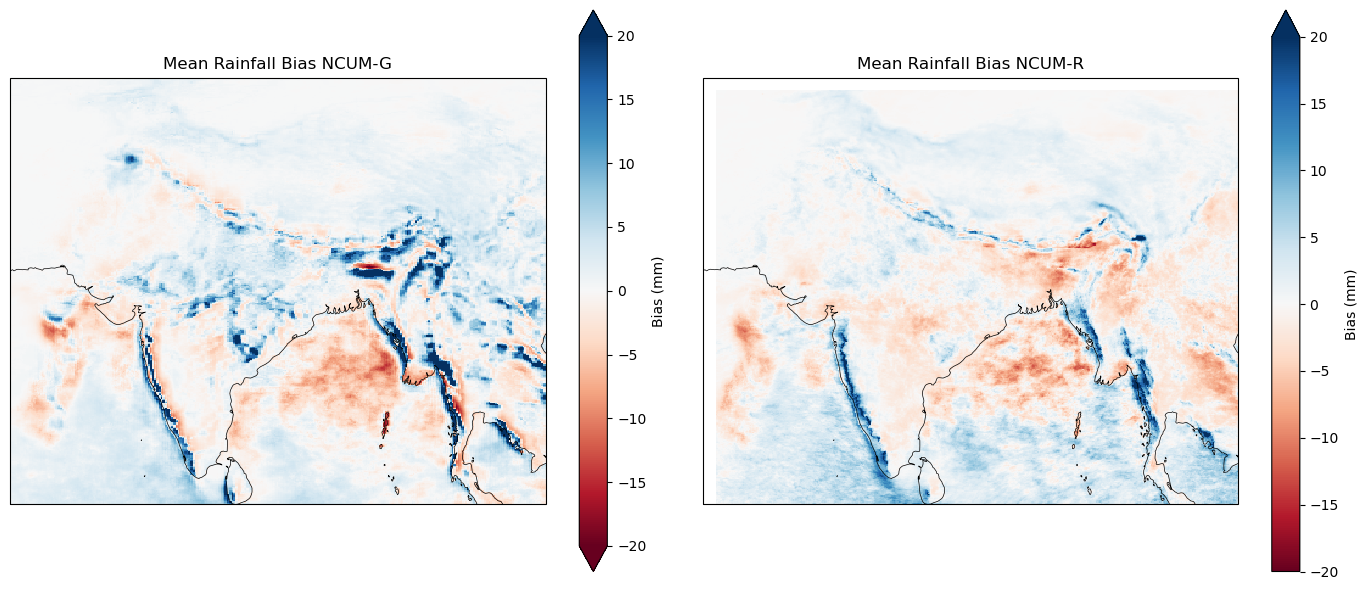

In [80]:
# mean rainfall
mean_obs = obs['rain'].mean(dim='time') 
mean_ncum_g = ncum_g_regridded['APCP_SURFACE'].mean(dim='time')
mean_ncum_r = ncum_r_regridded['APCP_24'].mean(dim='time')

#lat and lon slice
#mean_obs = mean_obs.sel(lat=slice(0, 45), lon=slice(60, 115))
#mean_ncum_g = mean_ncum_g.sel(lat=slice(0, 45), lon=slice(60, 115))
#mean_ncum_r = mean_ncum_r.sel(lat=slice(0, 45), lon=slice(60, 115))

# biases
bias_ncum_g = mean_ncum_g - mean_obs
bias_ncum_r = mean_ncum_r - mean_obs

# Plot
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(14, 6))

# Bias NCUM-G
ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
bias_ncum_g.plot(ax=ax1, cmap='RdBu', vmin=-20, vmax=20, cbar_kwargs={'label': 'Bias (mm)'})

ax1.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax1.set_title('Mean Rainfall Bias NCUM-G')

# Bias NCUM-R
ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
bias_ncum_r.plot(ax=ax2, cmap='RdBu', vmin=-20, vmax=20, cbar_kwargs={'label': 'Bias (mm)'})
ax2.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax2.set_title('Mean Rainfall Bias NCUM-R')

plt.tight_layout()
plt.show()



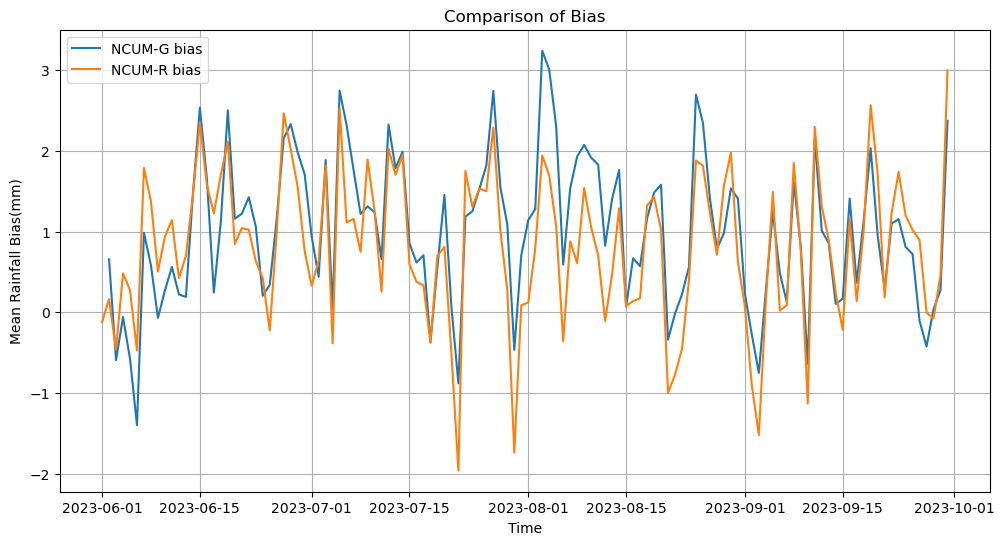

In [81]:
# mean rainfall
mean_obs = obs['rain'].mean(dim=('lat', 'lon')) 
mean_ncum_g = ncum_g_regridded['APCP_SURFACE'].mean(dim=('lat', 'lon'))
mean_ncum_r = ncum_r_regridded['APCP_24'].mean(dim=('lat', 'lon'))

# biases
bias_ncum_g = mean_ncum_g - mean_obs
bias_ncum_r = mean_ncum_r - mean_obs

#plot
plt.figure(figsize=(12,6))
plt.plot(bias_ncum_g['time'],bias_ncum_g, label='NCUM-G bias')
plt.plot(bias_ncum_r['time'],bias_ncum_r, label='NCUM-R bias')
plt.title('Comparison of Bias')
plt.xlabel('Time')
plt.ylabel('Mean Rainfall Bias(mm)')
plt.legend()
plt.grid(True)
plt.show()

1. The NCUM-R bias have slightly higher peaks than NCUM-G bias at some points.Even when they stay within a similar range overall.
2. Bias is fairly consistent across the Time period

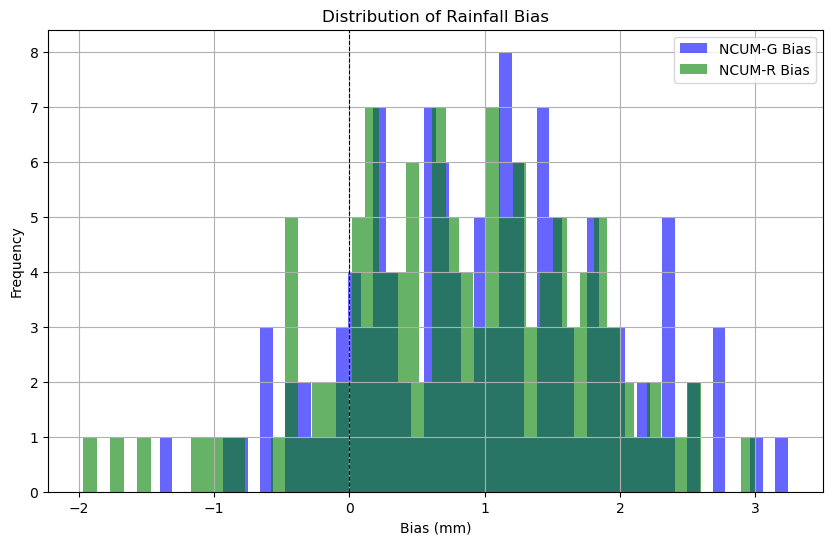

In [83]:
# Flatten bias data into 1D arrays
bias_g_flat = bias_ncum_g.values.flatten()
bias_r_flat = bias_ncum_r.values.flatten()

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(bias_g_flat, bins=50, alpha=0.6, label='NCUM-G Bias', color='blue')
plt.hist(bias_r_flat, bins=50, alpha=0.6, label='NCUM-R Bias', color='green')
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

#load data
ncum_g = xr.open_dataset('e:\\Dissertation\\ncumg_day1rf_jjas2023.nc')
ncum_r = xr.open_dataset('e:\\Dissertation\\ncumr_day1rf_jjas2023.nc')
obs = xr.open_dataset('e:\\Dissertation\\obs_JJAS2023.nc')

#regrid
ncum_g_regridded = ncum_g.interp_like(obs, method='nearest')
ncum_r_regridded = ncum_r.interp_like(obs, method='nearest')

plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Distribution of Rainfall Bias')
plt.xlabel('Bias (mm)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


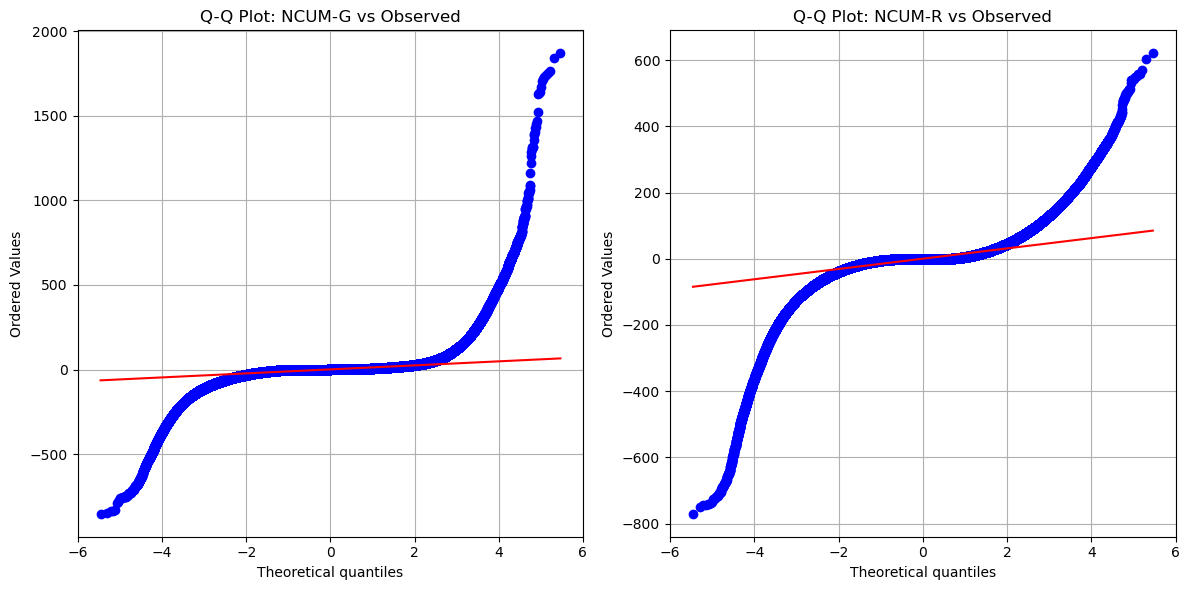

In [17]:
import scipy.stats as stats

# Flatten data
obs_flat = obs['rain'].values.flatten()
ncum_g_flat = ncum_g_regridded['APCP_SURFACE'].values.flatten()
ncum_r_flat = ncum_r_regridded['APCP_24'].values.flatten()

# Remove NaN
valid_obs_g = ~np.isnan(obs_flat) & ~np.isnan(ncum_g_flat)
valid_obs_r = ~np.isnan(obs_flat) & ~np.isnan(ncum_r_flat)

obs_flat_g = obs_flat[valid_obs_g]
ncum_g_flat = ncum_g_flat[valid_obs_g]

obs_flat_r = obs_flat[valid_obs_r]
ncum_r_flat = ncum_r_flat[valid_obs_r]

# Create Q-Q plots
plt.figure(figsize=(12, 6))

# Q-Q plot for NCUM-G
plt.subplot(1, 2, 1)
stats.probplot(ncum_g_flat - obs_flat_g, dist="norm", plot=plt)
plt.title('Q-Q Plot: NCUM-G vs Observed')
plt.grid()

# Q-Q plot for NCUM-R
plt.subplot(1, 2, 2)
stats.probplot(ncum_r_flat - obs_flat_r, dist="norm", plot=plt)
plt.title('Q-Q Plot: NCUM-R vs Observed')
plt.grid()

plt.tight_layout()
plt.show()


1. Both models show systematic biases, particularly in extreme rainfall values.
2. NCUM-G has larger biases in extreme rainfall compared to NCUM-R, while the reverse for low rainfall events.
3. The upward curve in the right tail means NCUM-G overestimates high rainfall events and the left tail's deviation implies underestimation of low rainfall events.

both model don't perfectly aligns with observed rainfall distribution, therefore there is room for improvement in the models